# Predicting software engineers salaries

## Table of contents
1. [Introduction](#introduction)
2. [Imports](#imports)
2. [Random Forest](#randomforest)
    1. [Dataset import](#randomforestdatasetimport)
    2. [Setting up variables](#rfVariables)
    3. [Split data and fit model](#rfModelFit)
    4. [Predictions](#rfPredictions)
    5. [Model Analysis](#rfModelAnalysis)
3. [Natural Language Processing](#nlp)
    1. [Data, Analysis and Predictions](#nlpDataSection)
        1. [Dataset import](#nlpDatasetImport)
        2. [Predictions](#nlpPredictions)
        3. [Data Pre-Processing](#nlpDataProcessing)
        4. [Data Analysis](#nlpDataAnalysis)
    2. [Words](#nlpWords)    
        1. [Word Pre-Processing](#nlpStopWords)
        2. [Word Vectorization](#nlpVector)
    3. [NLP AI Model](#nlpModel)
            1.


### Introduction<a name="introduction"></a>:
- Develop a process and model using AI that will be able to extrapolate a salary estimate for (software engineer) job postings 
- Document our team's progress and learning
- Demonstrate use of techniques from 
    - data scraping and collection
    - data pre-processing and cleaning
    - data analysis
    - AI techniques
    - evaluation of technique application
    
We explore various AI tools including:
    - NLTK for natural language processing
    - tensorflow and tflearn for modelling the neural network
    - sklearn for random forest model and in NLP feature extraction for our NLP NN
    

### Imports <a name="imports"></a>

In [33]:
#import libraries 
import csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.utils import to_categorical
import tensorflow as tf 
import tflearn
from matplotlib.pyplot import figure

#Libraries for Random Forset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# Metrics for testing accuracy 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Random Forest <a name="randomforest"></a>

### Importing dataset [Random Forest]<a name="randomforestdatasetimport"></a>

In [2]:
#load the data into a Pandas dataframe
jobsRF=pd.read_csv('SE(madeup).csv')
#display the first 3 rows on train_features
print(jobsRF.info())
jobsRF.head(3)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   jobListingId                  30 non-null     int64  
 1   jobTitle                      30 non-null     object 
 2   jobCategory-FullTime          30 non-null     int64  
 3   jobRemote                     30 non-null     int64  
 4   kilometerDistanceFromCentral  30 non-null     float64
 5   Salary                        30 non-null     int64  
 6   EasyToApply                   30 non-null     int64  
 7   GraduateJob                   30 non-null     int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 2.0+ KB
None


,jobListingId,jobTitle,jobCategory-FullTime,jobRemote,kilometerDistanceFromCentral,Salary,EasyToApply,GraduateJob
0,4209669018,Software Engineer,10132,0,2.766389,50561,0,1
1,4159125761,Embedded Software Engineer,10132,0,14.312570,58399,0,1
2,4201688830,Solutions Engineer,10146,0,2.766389,51464,1,0


In [3]:
df_all=jobsRF
jobsRF = jobsRF.select_dtypes(include=['int', 'float'])

In our first draft dataset there is 1 object features and 1 float feature and 6 int features some of them represented as booleans 1 being true and 0 being false. It uses data we collected from Glassdoors to calculate the distance from the capital and see if there is a correlation between that and salary. In this case our Salary field is made up since we were still exporing how to gather the data.

### Setting our X and y variables<a name="rfVariables"></a>

In [4]:
#arry of our features
result = []
for x in jobsRF.columns:
    if x != 'Salary':
        result.append(x)

#define X and y variables
X = jobsRF[result].values
y = jobsRF['Salary'].values

### Split the data, and fit the model <a name="rfModelFit"></a>

In [5]:
#split data into testing and training with a 80 20 split of train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Define our model and specify the hyperparamters and fit the model on training dataset
clf= RandomForestRegressor(n_estimators=15, max_depth=2, random_state=47, min_samples_split=4)
#fit the model
clf=clf.fit(X_train, y_train)
#check the score to see the level of acceptance of FP and FN.
print(clf.score(X_test, y_test))

-0.2455437816276782


### Make predictions <a name="rfPredictions"></a>

   Actual Salary  Predicted Salary
0          51464      41012.125328
1          45509      40721.945010
2          38776      41277.365380
3          36928      40085.537285
4          41624      46979.992857
5          39584      38350.149415


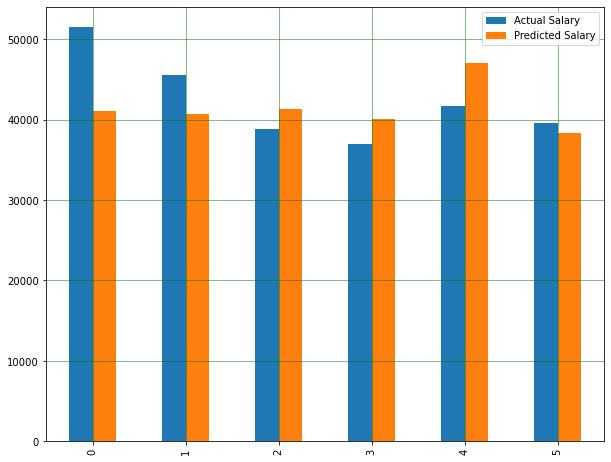

In [6]:
#make a prediction for our test dataset and assign it to the variable
y_pred = clf.predict(X_test)

#build a new data frame with two columns, the actual values of the test data,
#and the predictions of the model
#see our predicted value with the actual value
df_compare = pd.DataFrame({ 'Actual Salary': y_test, 'Predicted Salary': y_pred})
df_head = df_compare.head(25)
print(df_head)

df_head.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


### Analyze the model <a name="rfModelAnalysis"></a>

Mean: 42314.166666666664
Root Mean Squared Error: 5455.784344327331
Accuracy: 89.7 %.
-0.2455437816276782


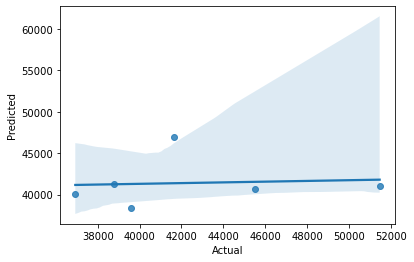

In [7]:
print('Mean:', np.mean(y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Performance metrics
errors = abs(y_pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
print(r2_score(y_test, y_pred))

df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
sns.regplot(x='Actual', y='Predicted', data=df_compare);
# plt.show()


This model had a hight accuracy but probaly is not very reliable and needs more testing and parameter tunnign. 

Therefore we have decided to look into Natural Lnaguage Processing on the second dataset that we managed to collect from Indeed website

## Natural Language Processing <a name="nlp"></a>

## Data, analysis and predictions<a name="nlp"></a>

### Importing dataset <a name="nlpDatasetImport"></a>

In [8]:
#load the data into a Pandas dataframe
jobs=pd.read_csv('data.csv')
#display the first 3 rows on train_features
print(jobs.info())
jobs.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        499 non-null    int64  
 1   Title             498 non-null    object 
 2   Company           499 non-null    object 
 3   Links             499 non-null    object 
 4   Ratings           171 non-null    float64
 5   Address           498 non-null    object 
 6   Salary            499 non-null    object 
 7   Job description   498 non-null    object 
 8   full-description  499 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 35.2+ KB
None


,Unnamed: 0,Title,Company,Links,Ratings,Address,Salary,Job description,full-description
0,0,Software Engineering - Graduate Programme,NatWest Group,https://uk.indeed.com/rc/clk?jk=8f62b7b76b6e98...,3.2,London,"£31,850 a year",Build the technical skills needed as you move ...,Our people work differently depending on their...
1,1,Software Engineer Apprentice,Lloyds Banking Group,https://uk.indeed.com/rc/clk?jk=52b45930987414...,3.8,Bristol,"£27,540 - £32,130 a year",Build simple data models and software designs....,"Please note, this site is only for external ca..."
2,2,Software Engineering - Internship,NatWest Group,https://uk.indeed.com/rc/clk?jk=64a0b8982e7fa0...,3.2,London,"£21,500 a year","Attend training workshops, get involved with o...",Our people work differently depending on their...


In our dataset there are 7 object features and 1 float feature. And later one we will create an integer column for average salary. The features Links will be used to fetch the full job description using Selenium. We will be looking at some dataset we collected from Glassdoors to calculate the distance from the capital and see if there is a correlation between that and salary. 

### Predictions <a name="nlpPredictions"></a>
Predicting how much of a significance job experience/description has on salary 
Many job postings that we gathered for our dataset had unique job titles. While scraping for Software Engineer jobs in the United Kingdom. We scraped over 1000 jobs. 
The most obvious roles that suggested level of experience were 'Junior', 'Graduate', 'Senior'. 
Another aspect of job titles that we expected might have an impact on the salary were specific role specializations/areas such as 'Frontend', and 'Backend' engineers. These along with the description were natural language aspects that we wanted to build a model for using AI to see whether we could accurately predict/estimate a salary.

### Further Data pre-processing<a name="nlpDataProcessing"></a>

Part of the data is filtered at the collection/scraping stage. Further processing occurs here.
Salary data that we had explored was presented in a variety of formats, ie; most commonly annual salary, monthly, daily and hourly wage.

_After reviewing the various data and despite coming up with a method to successfully convert salary data to a single format, we decided to simply filter out data not in the annual salary format. This could be easily adjusted and changed in a future version of the process.
This should be kept in mind as the dataset and thus the resulting training will be different than if sample data had the other formats included._

- Removed duplicate rows.
- Removed rows with any elements null/missing

We then convert the string salary values to numerical format and in the case of a range (indicated by a present '-' character in the string) we also calculate the average from the range to pass on.

In [9]:
testing_set = jobs[jobs['Salary'].isnull()]

def string_to_salary(x):
    #check if the salary is already correctly formatted
    if type(x) == int:
        return x
        
    # check for range and 
    if '-' in str(x):
        # remove currency symbols and commas from string 
        x = re.sub(r"[$£,]", '', x)
        #find only the numbers
        ns = re.findall('[\d,]+', x)
        ns_sum = 0
        for n in ns:
            #sum the salary range values
            ns_sum += int(n)
        #return average of salary range
        return (ns_sum/len(ns))
    else:
        # same as before case, remove unnecessary symbols and get numerical value
        x = re.sub(r"[$£,]", '', x)
        n = re.findall('[\d,]+', x)
        return float(n[0])

# drop rows with missing elements and drop duplicates
jobs.dropna(inplace=True)
jobs.drop_duplicates()
#filter for job listing only containing salaries in year format/containing 'year' in salary field    
jobs = jobs[jobs.Salary.str.contains("year") == True]

#call the string_to_salary method to map actual numerical values to real_salary column in jobs dataframe
jobs['real_salary'] = jobs['Salary'].map(string_to_salary)

### Data Analysis <a name="nlpDataAnalysis"></a>

In order to understand our data we utilised different data presentation methods from tabular to graphical to add a visual representation of its features.

#### Salary by title

In [10]:
#(DATAFRAME COMPARE)
df_compare = pd.DataFrame({'Job Title':jobs['Title'],'Actual':jobs['Salary'], 'Average': jobs['real_salary']})
df_compare.head(10)

,Job Title,Actual,Average
0,Software Engineering - Graduate Programme,"£31,850 a year",31850.0
1,Software Engineer Apprentice,"£27,540 - £32,130 a year",29835.0
2,Software Engineering - Internship,"£21,500 a year",21500.0
3,Software Developer,"£39,309 - £48,226 a year",43767.5
4,Java Software Engineer,"£57,861 - £75,710 a year",66785.5
5,Java Software Engineer,"£57,861 - £75,710 a year",66785.5
6,"Software Engineering Manager, Product","£90,000 - £140,000 a year",115000.0
7,Senior Software Engineer,"£54,943 a year",54943.0
8,Java Software Engineer,"£35,310 - £55,666 a year",45488.0
10,Backend Engineer,"£90,000 - £116,000 a year",103000.0


**Summarizing feature variables**

In [11]:


#Function to find the median and plot it on the graph
def show_median(df,col):
  sns.set_theme(style="whitegrid")
  plt.figure(figsize=(20,15))
  plt.subplot(3,1,1)
  my_order = df.groupby(by=[col])['real_salary'].median().sort_values(ascending=True).index
  plt.xticks(rotation=45,ha='right')
  sns.boxplot(x=col, y="real_salary", data=df, order=my_order)

  plt.show()

#Function to find the mean and plot it on the graph
def show_mean(df,col):
  plt.figure(figsize=(20,15))
  plt.subplot(3,1,2)
  mean=df.groupby(by=[col])['real_salary'].mean().sort_values().plot()
  plt.xlabel(col)
  plt.ylabel('mean real_salary')

  plt.show()

#Function to count column values and plot it on the graph
def show_count(df,col):
  plt.figure(figsize=(20,15))
  plt.subplot(3,1,3)
  df[col].value_counts().sort_values().plot() 
  plt.xlabel(col)
  plt.ylabel('count')

  plt.show()

See what is the range of salary based on the Company 

*Showing the mean salary per Company*

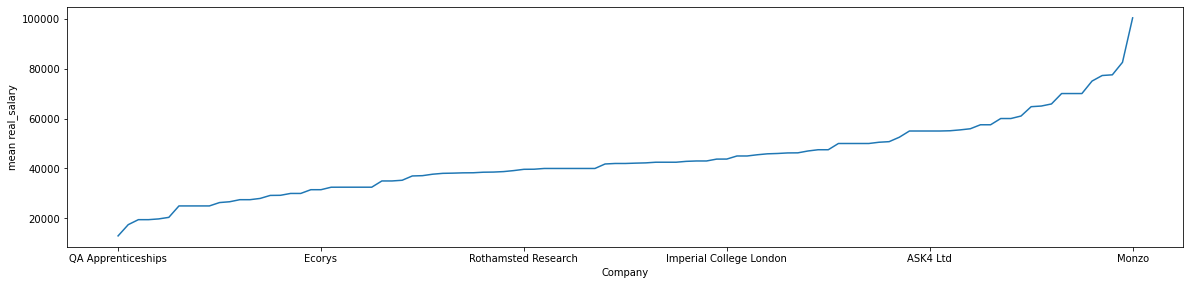

In [12]:
show_mean(jobs, 'Company')

*Showing the median salary per Comapany as a range*



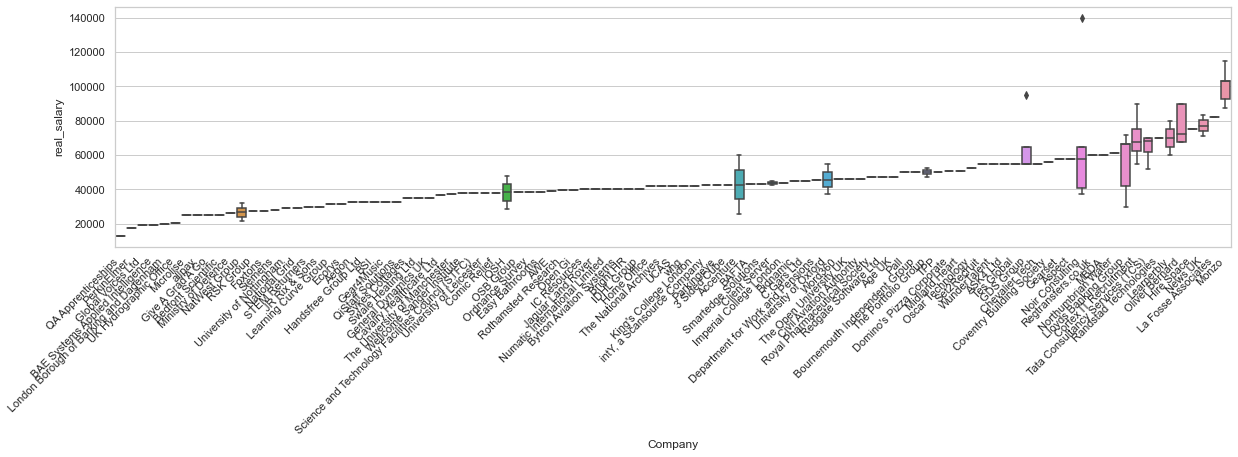

In [13]:
show_median(jobs, 'Company')

See what is the range of salary based on the Job Title

*Showing the mean salary per job Title*

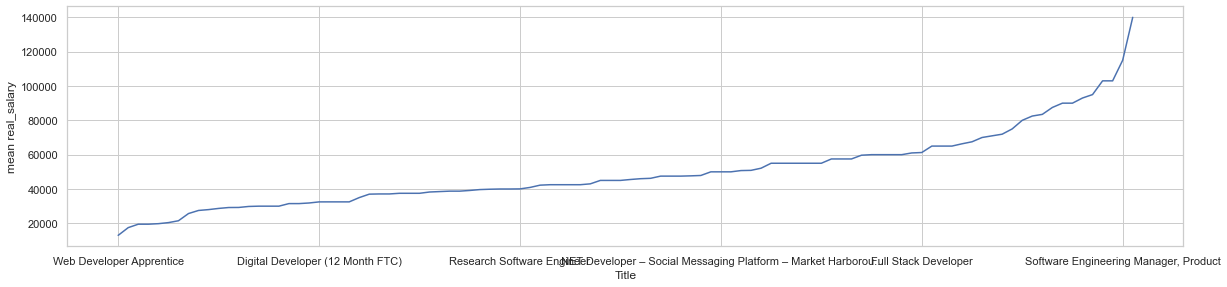

In [14]:
show_mean(jobs, 'Title')


*Showing the median salary per job Title* - @ TODO Normalise job titles

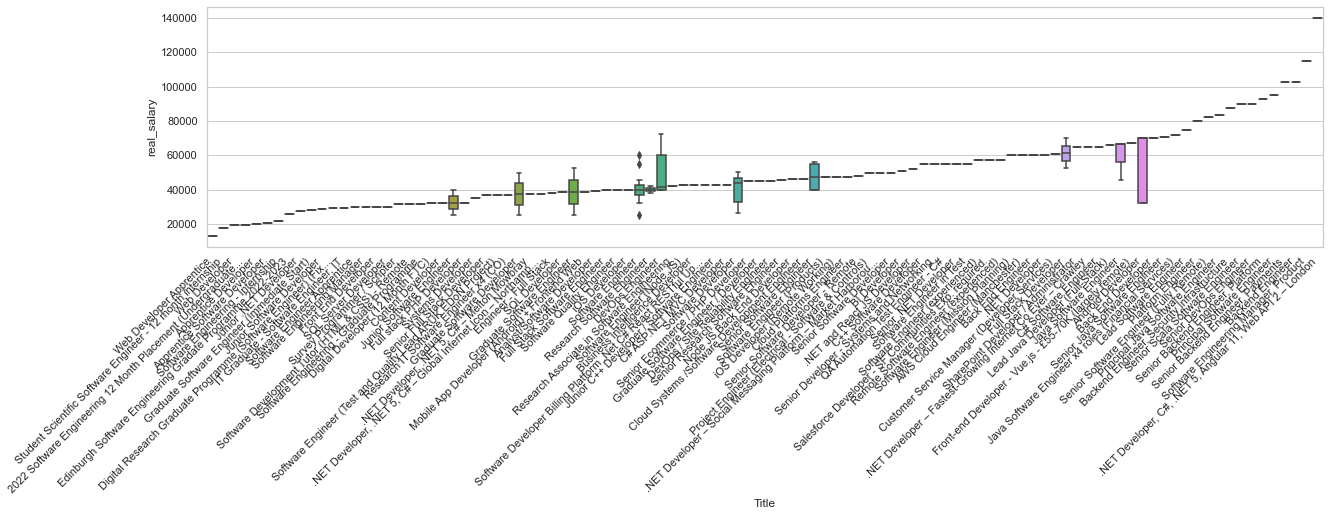

In [15]:
show_median(jobs, 'Title')

*Showing the median salary per job Title*

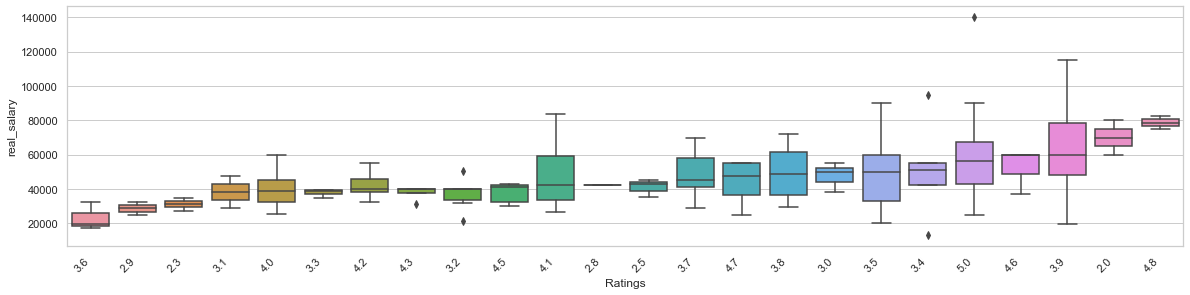

In [16]:
show_median(jobs, 'Ratings')

See correlation between Ratings and Salaries

In [17]:
print("Correlation between Salary and Ratings", jobs['real_salary'].corr(jobs['Ratings']))
jobs.corr()

Correlation between Salary and Ratings 0.16618916243332618


,Unnamed: 0,Ratings,real_salary
Unnamed: 0,1.000000,0.198308,0.040013
Ratings,0.198308,1.000000,0.166189
real_salary,0.040013,0.166189,1.000000


### Summarize the target variable

Since our target variable is salary we want to see the density of our data and the range of salaries that we have

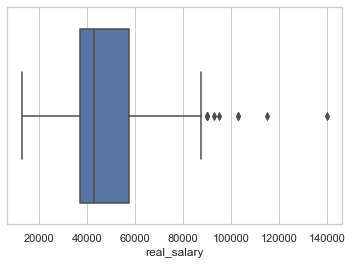

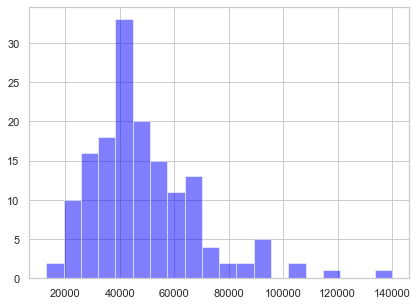

In [18]:

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=jobs["real_salary"])

plt.figure(figsize=(15,5))
salary=jobs['real_salary']
plt.subplot(1,2,1)
num_bins=20
n, bins, patches=plt.hist(salary, num_bins, facecolor='blue', alpha=0.5)

Plot distribution graph with the mean and a median values

### Word specific preprocessing - 'Stop Words' <a name="nlpStopWords"></a>

Removing stop words from the combined description texts. It would be worth reviewing the corpus of stop words that we employed for this project, in this case we went with the common english language stopwords supplied with the nltk package. 
For the purpose of searching for primarily significant/key tech related words may want to consider expanding the corpus.

English stopwords corpus expanded:
https://www.nltk.org/book/ch02.html

In [19]:
#nltk stopwords corpus
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

#we could have used sklearn for stop words but we wrote this section beforehand

#returns words cleaned of stop words    
def remove_stopwords(row):
    wordsCleaned = []
    #loop through dataframe rows and omitting append on stop words
    for word in row.split():
        if word not in stopwords:
            wordsCleaned.append(word)            
    return ' '.join(wordsCleaned)

#combining job title text with description and removing stop words from them
listing_text = jobs['full-description'].transform(remove_stopwords).values + ', ' + jobs['Title'].transform(remove_stopwords).values


## Words <a name="nlpWords"></a>

### Word vectorisation <a name="nlpVector"></a>

As per sklearn CountVectorizer documentation here we
"Convert a collection of text documents to a matrix of token counts."

We then take this matrix and perform some data type conversions to use it in our Deep Learning model.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [20]:
# Similar words being close together allows us to generalize from one sentence to a class of similar sentences

#initialise CountVectorizer, limit features to top 500
count_vect = CountVectorizer(max_features=500)
#apply the CountVectorizer to our listing texts
text_vector = count_vect.fit_transform(listing_text)

#CountVectorizer fit and transform returns a sparse matrix
print(text_vector.shape)
print(type(text_vector))
print(text_vector.toarray()[:5, :23])

#convert sparse matrix to standard numpy matrix
text_vector = text_vector.todense()
print(type(text_vector))
print(text_vector[:5, :23])

#convert numpy matrix to numpy array for use in our model
text_vector = np.squeeze(np.asarray(text_vector))
print(text_vector.shape)
print(type(text_vector))
print(text_vector[:5, :23])


(155, 500)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 1 0 0 0 0 0 0 0 0 0 1 3 2 0 2 1 0 1 1 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 2 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 3 1 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 1 1 0 0 0 1 0 0 2 1 2 0 3 0 0 6 1 0]]
<class 'numpy.matrix'>
[[0 0 0 1 0 0 0 0 0 0 0 0 0 1 3 2 0 2 1 0 1 1 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 2 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 3 1 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 1 1 0 0 0 1 0 0 2 1 2 0 3 0 0 6 1 0]]
(155, 500)
<class 'numpy.ndarray'>
[[0 0 0 1 0 0 0 0 0 0 0 0 0 1 3 2 0 2 1 0 1 1 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 2 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 3 1 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 1 1 0 0 0 1 0 0 2 1 2 0 3 0 0 6 1 0]]


## NLP Deep Learning Model<a name="nlpModel"></a>

## Building the deep learning network using TFLearn 

We will using [TFlearn](http://tflearn.org/) to build the deep learning network which will allow us to interface with TensorFlow by simply defining layers. 


TFlearn is a modular and transparent deep learning library built on top of Tensorflow. It was designed to provide a higher-level API to TensorFlow in order to facilitate and speed-up experimentations, while remaining fully transparent and compatible with it.

### Creating training labels

We divided the vectorised salary data that we are using as a classifier into `train` and `test` labels at a 4:5 ratio.

At first, we were dividing the `real_salary` into the training and test labels. Using `.shape` to check the size of the categorised training set resulted in a data frame with shape of:
```
classifier = jobs['real_salary'].fillna(0).values.astype(int)
...
print(to_categorical(classifier[train]).shape)
> (31, 115001)
```

As a result, when we were training the model with the aforementioned datasets, the model was achieving extrmely low accuracy rates during the training step after thousands of training steps.  

<div class="alert alert-block alert-info">
Training Step: 3468  | total loss: 5.89098 | time: 1.056s
    | SGD | epoch: 3468 | loss: 5.89098 - <b>acc: 0.1125</b> | val_loss: 8.19356 - val_acc: 0.1000 -- iter: 21/21
</div>
 
We decided that the data should be normalised by quantiles during pre-processing to speed up the training.

In [21]:
# Defining four quantiles that will classify the range of salaries during the testing phase. 
fq = jobs['real_salary'].quantile(0.25)
sq = jobs['real_salary'].quantile(0.50)
tq = jobs['real_salary'].quantile(0.75)

# Classifying the salaries in the top 0.1 quantile which may have a lot of variance as salaries
# could scale inelastic to skills but experience in the industry. 
# In the final prediction column, the salaries will be classified as x or more. For example, £100,000+
topTen = jobs['real_salary'].quantile(0.90)

print('Average of the listed salaries: ' + str(jobs['real_salary'].mean()))
# Applying the quantile normalisation to speed up training.
jobs['normalised_salary'] = jobs['real_salary'].apply(
    lambda n: 0 if n < fq else (1 if n >= fq and n < sq else (2 if n >= sq and n < tq else (4 if n > topTen else 3))))

# Defining the classifier as the salary column that has been transformed previously to (0 2)
classifier = jobs['normalised_salary'].values 
 
# Out of the 500 job records we scaped, only 38 of them had a salary listing associated with it.
# We will use a training to testing ratio of 0.8 
tratio = 0.8
classifierSize = len(classifier)

# The training and test labels containers are created. Based on the example above
# Training set is created of size 30 and testing set of 8 
# Purpose of text_vector is explained during the encoding
train   = np.arange(classifierSize)[:int(classifierSize*tratio)]
X_train =  text_vector[train,:]

# Returns a matrix of binary values that has the number of rows equal to length of the sampled training set (0.8) 
normalised_label =  to_categorical(classifier[train], 5)

Average of the listed salaries: 48679.65806451613


## Building the network

Our TFLearn model will have its `input_data` set to 500 since there are 500 job descriptions that we are training it with. 

In the hidden layer, we are using `ReLU` activation function which is a linear function. This speeds up the training because the gradient computation is trivial by resolving to either 0 or 1 depending on the sign of input. 

We are using `tflearn.tflearn.fully_connected` to add a fully connected layer.  

The model is aiming to predict the normalised salary range for each job description. That is:
> __Salary Range:__ <br> 
    '0': Salary values that is less than `0.25` quantile. <br>
    '1': Salary values that is between `0.50` and `0.75` quantile. <br>
    '2': Salary values that is between `0.75` and `0.90` quantile. <br>
    '3': Salary values that is between `0.90` and top `0.1` quantile. 
    '4: Salary values that is above the top `0.1` quantile. 

 
- A validation set of `0.25` random elements is performed on the dataset
- The accuracy of the model is calculated on the validation set

## Models

We used the recommended parameters for the model which was recommended on the [TFLearn website](http://tflearn.org/optimizers/)

> __Adam:__ Adapative Moment Estimation, this makes use of combination of ideas from other optimisers. Uses exponentitally decaying average of previous gradients. This provides an adaptive learning rate which is calculated in a similar way to RMSProp. 

> __ProximalAdagrad:__ Makes use of regulaisation and [forward-backword splitting: Paper by John Duchi](https://proceedings.neurips.cc/paper/2009/file/621bf66ddb7c962aa0d22ac97d69b793-Paper.pdf)

> __Stochastic gradient descent:__  This model picks a random data point from the data set at each step to reduce the overall training time.

* The `learning_rate` is a flexible parameter that determines the convergence of the algorithm. Simply put, a higher rate will result in the model stepping through at a higher gradient, which may mean that that the local minima is missed. Therefore, we set the learning rate to `0.01` which was used on the TFLearn example. 

* We have used a `lr_decay` rate of `0.95` which is [recommened](https://medium.com/analytics-vidhya/learning-rate-decay-and-methods-in-deep-learning-2cee564f910b) and worked well with our dataset. 
     

* The SGD optimiser uses learning rate decay `lr_decay` In the [TFLearn's Github repository](https://github.com/tflearn/tflearn/blob/master/tflearn/optimizers.py), the decayed learning rate which applies a exponential decay function to the learning rate, which is set to `0.01` expotentially. It is defined as: 

   ```decayed_learning_rate =```</br>` ```                    learning_rate * decay_rate ^ (global_step / decay_steps)```  

If the normalised salary label is present, it is converted into a categorical encoding through the `to_categorical` method.

In [22]:
def Model():
    # Resetting the model's variables 
    tf.compat.v1.reset_default_graph()    
    
    # The input layer where we define the shape of the training set  
    net = tflearn.input_data([None, 500])
    
    # The hidden layer where the activation function is declared for the inputs
    net = tflearn.fully_connected(net, 200, activation='ReLU')
 
    # The dropout layer which has to be assigned after the hidden layer which helps improve 
    # the accuracy of the model.
    net = tflearn.dropout(net, keep_prob=0.3)
    
    # The model is aiming to predict the normalised salary [0 to 5]. There are 5 outputs 
    # so we need define 5 output neurons. 
    net = tflearn.fully_connected(net, 5, activation='softmax')
      
    # Different estimaters used to test model
    adam = tflearn.optimizers.Adam(learning_rate=0.001, beta1=0.99)
    # adagrad = tflearn.optimizers.AdaGrad(learning_rate=0.01, initial_accumulator_value=0.01)
    # proxi_adagrad = tflearn.optimizers.ProximalAdaGrad(learning_rate=0.01, initial_accumulator_value=0.01)
    # rmsprop = tflearn.optimizers.RMSProp(learning_rate=0.1, decay=0.999)
    # sgd = tflearn.optimizers.SGD(learning_rate=0.01, lr_decay=0.95, decay_step=1000)
    
    # categorical crossentropy is a loss function used for classifying the data
    # and predicted the prabability as to what class it belongs in.
   
    net = tflearn.regression(net, optimizer=adam, loss='categorical_crossentropy')
    # net = tflearn.regression(net, optimizer=adagrad, loss='categorical_crossentropy')
    # net = tflearn.regression(net, optimizer=proxi_adagrad, loss='categorical_crossentropy')
    # net = tflearn.regression(net, optimizer=rmsprop, loss='categorical_crossentropy')
    # net = tflearn.regression(net, optimizer=sgd, loss='categorical_crossentropy')

    model = tflearn.DNN(net)
     
    return model

# Creating the model
model = Model()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [23]:
# model.fit(X_train, normalised_label, validation_set=0.25, show_metric=True, batch_size=64, n_epoch=100)
model.fit(X_train, normalised_label, validation_set=0.25, show_metric=True, batch_size=64, n_epoch=300)

Training Step: 599  | total loss: 0.97400 | time: 0.001s
| Adam | epoch: 300 | loss: 0.97400 - acc: 0.7849 -- iter: 64/93
Training Step: 600  | total loss: 0.90059 | time: 1.011s
| Adam | epoch: 300 | loss: 0.90059 - acc: 0.8064 | val_loss: 1.36117 - val_acc: 0.4194 -- iter: 93/93
--


In [24]:
model.save('./model.tflearn')

INFO:tensorflow:C:\Users\44757\Untitled Folder\final\model.tflearn is not in all_model_checkpoint_paths. Manually adding it.


In [25]:
model.save('./model.tflearn')

INFO:tensorflow:C:\Users\44757\Untitled Folder\final\model.tflearn is not in all_model_checkpoint_paths. Manually adding it.


In [26]:
# # Rebuilding neural network
# This may be helpful if we want to save the model, and to reload it without having to train it each time
# tf.compat.v1.reset_default_graph()
# net = tflearn.input_data([None, 500])
# net = tflearn.fully_connected(net, 200, activation='ReLU')
# net = tflearn.dropout(hidden_layer, keep_prob=0.3)
# sgd = tflearn.optimizers.SGD(learning_rate=0.01, lr_decay=0.95, decay_step=1000)
# net = tflearn.regression(net, optimizer=sgd, loss='categorical_crossentropy')
 
# Define model and setup tensorboard visualisations
# model = tflearn.DNN(net, tensorboard_verbose=3)
# model.load('model.tflearn')

In [34]:
# Purpose of text_vector is explained during the encoding
# The testing vector is created as 0.2 of the vectorised words
# It is tested against the normalised label 
test = np.arange(classifierSize)[int(classifierSize*tratio):]
X_test  = text_vector[test,:]
normalised_label  = to_categorical(classifier[test])

# The normalised salaries from 0 to 4 that is from the actual training description
# along with the normalised salary produced by the trained model 
normalised_salary_prediction = np.argmax(np.array(model.predict(X_test)), axis=1)
normalised_salary_actual = np.argmax(normalised_label, axis=1)
print('Salaries normalised (Actual): ' + str(normalised_salary_actual))
print('Salaries normalised (Predictions): ' + str(normalised_salary_prediction))

# Metrics that we will use for evaluation of model results
confusion = confusion_matrix(normalised_salary_actual, normalised_salary_prediction)
print('Confusion matrix')
print(confusion)
classification = classification_report(normalised_salary_prediction, normalised_salary_actual)
print('Classification report:')
print(classification)

Salaries normalised (Actual): [1 1 3 0 2 3 0 1 1 1 4 1 2 3 0 1 2 0 0 2 0 2 2 0 3 0 1 3 2 2 2]
Salaries normalised (Predictions): [2 2 3 1 1 3 1 2 1 2 2 1 2 3 2 2 2 1 1 3 1 1 2 2 3 0 1 1 1 1 1]
Confusion matrix
[[1 5 2 0 0]
 [0 3 5 0 0]
 [0 5 3 1 0]
 [0 1 0 4 0]
 [0 0 1 0 0]]
Classification report:
              precision    recall  f1-score   support

           0       0.12      1.00      0.22         1
           1       0.38      0.21      0.27        14
           2       0.33      0.27      0.30        11
           3       0.80      0.80      0.80         5
           4       0.00      0.00      0.00         0

    accuracy                           0.35        31
   macro avg       0.33      0.46      0.32        31
weighted avg       0.42      0.35      0.37        31



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
# Defining the string representation for the normalised salary range 
def predict(jobs):
    fqt = '£0 - ' + str(round(fq, 1)) 
    sqt = '£' + str(round(fq, 1))  + ' - £' + str(round(sq, 1)) 
    tqt = '£' + str(round(sq, 1))  + ' - £' + str(round(tq, 1)) 
    fqt = '£' + str(round(tq, 1))  + ' - £' + str(round(topTen, 1)) 
    ten = '£' + str(round(topTen, 1))  + '+'
    salaryRange = {'0': fqt, '1': sqt, '2': tqt, '3': fqt, '4': ten}
    
    # The normalised salary function which gets the 
    predicted_salary_normalised = np.argmax(np.array(model.predict(text_vector)), axis=1)
    jobs['Estimated range (in £)'] = [salaryRange[str(fqt)] if str(fqt) in [*salaryRange] else None for fqt in predicted_salary_normalised]
    return jobs

In [36]:
predict(jobs)
jobs

,Unnamed: 0,Title,Company,Links,Ratings,Address,Salary,Job description,full-description,real_salary,normalised_salary,Estimated range (in £),Prediction (in £)
0,0,Software Engineering - Graduate Programme,NatWest Group,https://uk.indeed.com/rc/clk?jk=8f62b7b76b6e98...,3.2,London,"£31,850 a year",Build the technical skills needed as you move ...,Our people work differently depending on their...,31850.0,0,£57500.0 - £71543.7,64521.5
1,1,Software Engineer Apprentice,Lloyds Banking Group,https://uk.indeed.com/rc/clk?jk=52b45930987414...,3.8,Bristol,"£27,540 - £32,130 a year",Build simple data models and software designs....,"Please note, this site is only for external ca...",29835.0,0,£37118.0 - £43000.0,40059.0
2,2,Software Engineering - Internship,NatWest Group,https://uk.indeed.com/rc/clk?jk=64a0b8982e7fa0...,3.2,London,"£21,500 a year","Attend training workshops, get involved with o...",Our people work differently depending on their...,21500.0,0,£57500.0 - £71543.7,64521.5
3,3,Software Developer,Imperial College London,https://uk.indeed.com/rc/clk?jk=f9f27d3295269f...,4.2,South Kensington,"£39,309 - £48,226 a year",Experience with web software development.\nCur...,The Department of Electrical and Electronic En...,43767.5,2,£43000.0 - £57500.0,50250.0
4,4,Java Software Engineer,Lloyds Banking Group,https://uk.indeed.com/rc/clk?jk=85a64c0bb79fa3...,3.8,London,"£57,861 - £75,710 a year",As a Java Engineer within the Consumer Servici...,End Date\nSunday 09 January 2022\nSalary Range...,66785.5,3,£57500.0 - £71543.7,64521.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,485,".NET Developer, .NET 5, C# – Global Internet I...",Noir Consulting,https://uk.indeed.com/pagead/clk?mo=r&ad=-6NYl...,5.0,Northampton Remote,"£30,000 - £45,000 a year","NET 5, C#, Blazor, Azure, JavaScript, HTML5, C...",".NET Developer, .NET 5, C# - Global Internet I...",37500.0,1,£37118.0 - £43000.0,40059.0
487,487,.NET Developer – Fastest-Growing Internet Co E...,Noir Consulting,https://uk.indeed.com/pagead/clk?mo=r&ad=-6NYl...,5.0,Crawley,"£60,000 - £70,000 a year",NET Developer to work on the development of co...,.NET Developer - Fastest-Growing Internet Co E...,65000.0,3,£37118.0 - £43000.0,40059.0
488,488,.NET Developer – Social Messaging Platform – M...,Noir Consulting,https://uk.indeed.com/pagead/clk?mo=r&ad=-6NYl...,5.0,Market Harborough+7 locations,"£45,000 - £55,000 a year",.NET Developer - Social Messaging Platform - M...,.NET Developer - Social Messaging Platform - M...,50000.0,2,£37118.0 - £43000.0,40059.0
490,490,Senior Software Engineer,Coventry Building Society,https://uk.indeed.com/pagead/clk?mo=r&ad=-6NYl...,3.9,Coventry,"£44,800 - £67,000 a year","Regularly presenting software solutions, which...","You'll be a member of the Design Authority, pr...",55900.0,2,£37118.0 - £43000.0,40059.0


## Printing jobs before the prediction range is converted into an estimated salary

In [37]:
## Mapping the numeric salary prediction from the average of the quantile range
jobs['Prediction (in £)'] = jobs['Estimated range (in £)'].astype(str).replace('\.[0-9]', '', regex=True).map(string_to_salary)
jobs.to_csv("./predictions.csv")
jobs.tail(10)

,Unnamed: 0,Title,Company,Links,Ratings,Address,Salary,Job description,full-description,real_salary,normalised_salary,Estimated range (in £),Prediction (in £)
470,470,Senior Ecommerce / PHP Developer,C.Gars Ltd,https://uk.indeed.com/pagead/clk?mo=r&ad=-6NYl...,2.5,Norwich Remote,"£40,000 - £50,000 a year",Daily tasks would involve creating new site fe...,We are currently seeking a senior ecommerce / ...,45000.0,2,£37118.0 - £43000.0,40059.0
475,475,Senior Developer - Systems and Networking,ASK4 Ltd,https://uk.indeed.com/pagead/clk?mo=r&ad=-6NYl...,4.7,London Remote,"£50,000 - £60,000 a year","To work as part of Technology department, resp...","About us\nEstablished in 2000, ASK4 delivers c...",55000.0,2,£43000.0 - £57500.0,50250.0
476,476,Full stack PHP Developer,QiStaff Solutions,https://uk.indeed.com/pagead/clk?mo=r&ad=-6NYl...,4.2,Llandudno LL30 2HL Remote,"£25,000 - £40,000 a year",Building robust and scalable software in multi...,# Role : Full Stack PHP Developer\nWe are look...,32500.0,0,£43000.0 - £57500.0,50250.0
481,481,Front-end Developer - Vue.js - £55-70K (largel...,Oliver Bernard,https://uk.indeed.com/pagead/clk?mo=r&ad=-6NYl...,5.0,London W11 Temporarily Remote,"£55,000 - £80,000 a year",Minimum of 2 years of professional experience ...,Front-end Developer - Vue.js\nA Front-end Deve...,67500.0,3,£57500.0 - £71543.7,64521.5
484,484,Web Developer Apprentice,QA Apprenticeships,https://uk.indeed.com/pagead/clk?mo=r&ad=-6NYl...,3.4,Blyth NE24 3AF,"£13,000 a year",Hybrid office / Working from home location. [d...,"Employer description:\nBased in Blyth, Northum...",13000.0,0,£57500.0 - £71543.7,64521.5
485,485,".NET Developer, .NET 5, C# – Global Internet I...",Noir Consulting,https://uk.indeed.com/pagead/clk?mo=r&ad=-6NYl...,5.0,Northampton Remote,"£30,000 - £45,000 a year","NET 5, C#, Blazor, Azure, JavaScript, HTML5, C...",".NET Developer, .NET 5, C# - Global Internet I...",37500.0,1,£37118.0 - £43000.0,40059.0
487,487,.NET Developer – Fastest-Growing Internet Co E...,Noir Consulting,https://uk.indeed.com/pagead/clk?mo=r&ad=-6NYl...,5.0,Crawley,"£60,000 - £70,000 a year",NET Developer to work on the development of co...,.NET Developer - Fastest-Growing Internet Co E...,65000.0,3,£37118.0 - £43000.0,40059.0
488,488,.NET Developer – Social Messaging Platform – M...,Noir Consulting,https://uk.indeed.com/pagead/clk?mo=r&ad=-6NYl...,5.0,Market Harborough+7 locations,"£45,000 - £55,000 a year",.NET Developer - Social Messaging Platform - M...,.NET Developer - Social Messaging Platform - M...,50000.0,2,£37118.0 - £43000.0,40059.0
490,490,Senior Software Engineer,Coventry Building Society,https://uk.indeed.com/pagead/clk?mo=r&ad=-6NYl...,3.9,Coventry,"£44,800 - £67,000 a year","Regularly presenting software solutions, which...","You'll be a member of the Design Authority, pr...",55900.0,2,£37118.0 - £43000.0,40059.0
498,498,Senior Software Developer - Remote,IOSH,https://uk.indeed.com/pagead/clk?mo=r&ad=-6NYl...,3.1,Birmingham Remote,"£38,250 - £57,500 a year",Version control software (Git) expertise.\nAlo...,"Salary – up to £57,500 per annum depending on ...",47875.0,2,£37118.0 - £43000.0,40059.0


## Testing on other datasets
The trained model can be used to predict salaries on other dataframes. They do not need to have a salary.

In [38]:
#testing_set = jobs[jobs['Salary'].isnull()]
# predict(testing_set)

## Graphing a bar chart to see the salary that was stated in the job description against the salary predicted by the model.

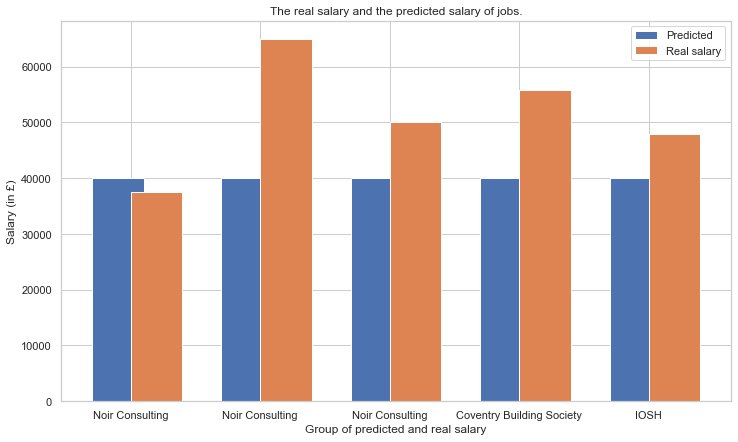

In [39]:
# using figure to increase the size of the plot
figure(figsize=(12, 7))

y1 = jobs['Prediction (in £)'].tail(5) 
y2 = jobs['real_salary'].tail(5)
x1 = jobs['Company'].tail(5).values.tolist()
X = np.arange(len(x1))

plt.bar(X - 0.1, y1, 0.4, label = 'Predicted')
plt.bar(X + 0.2, y2, 0.4, label = 'Real salary')

plt.xlabel("Group of predicted and real salary")
plt.xticks(X, x1)
plt.ylabel("Salary (in £)")
plt.title("The real salary and the predicted salary of jobs.")
plt.legend()
plt.show()

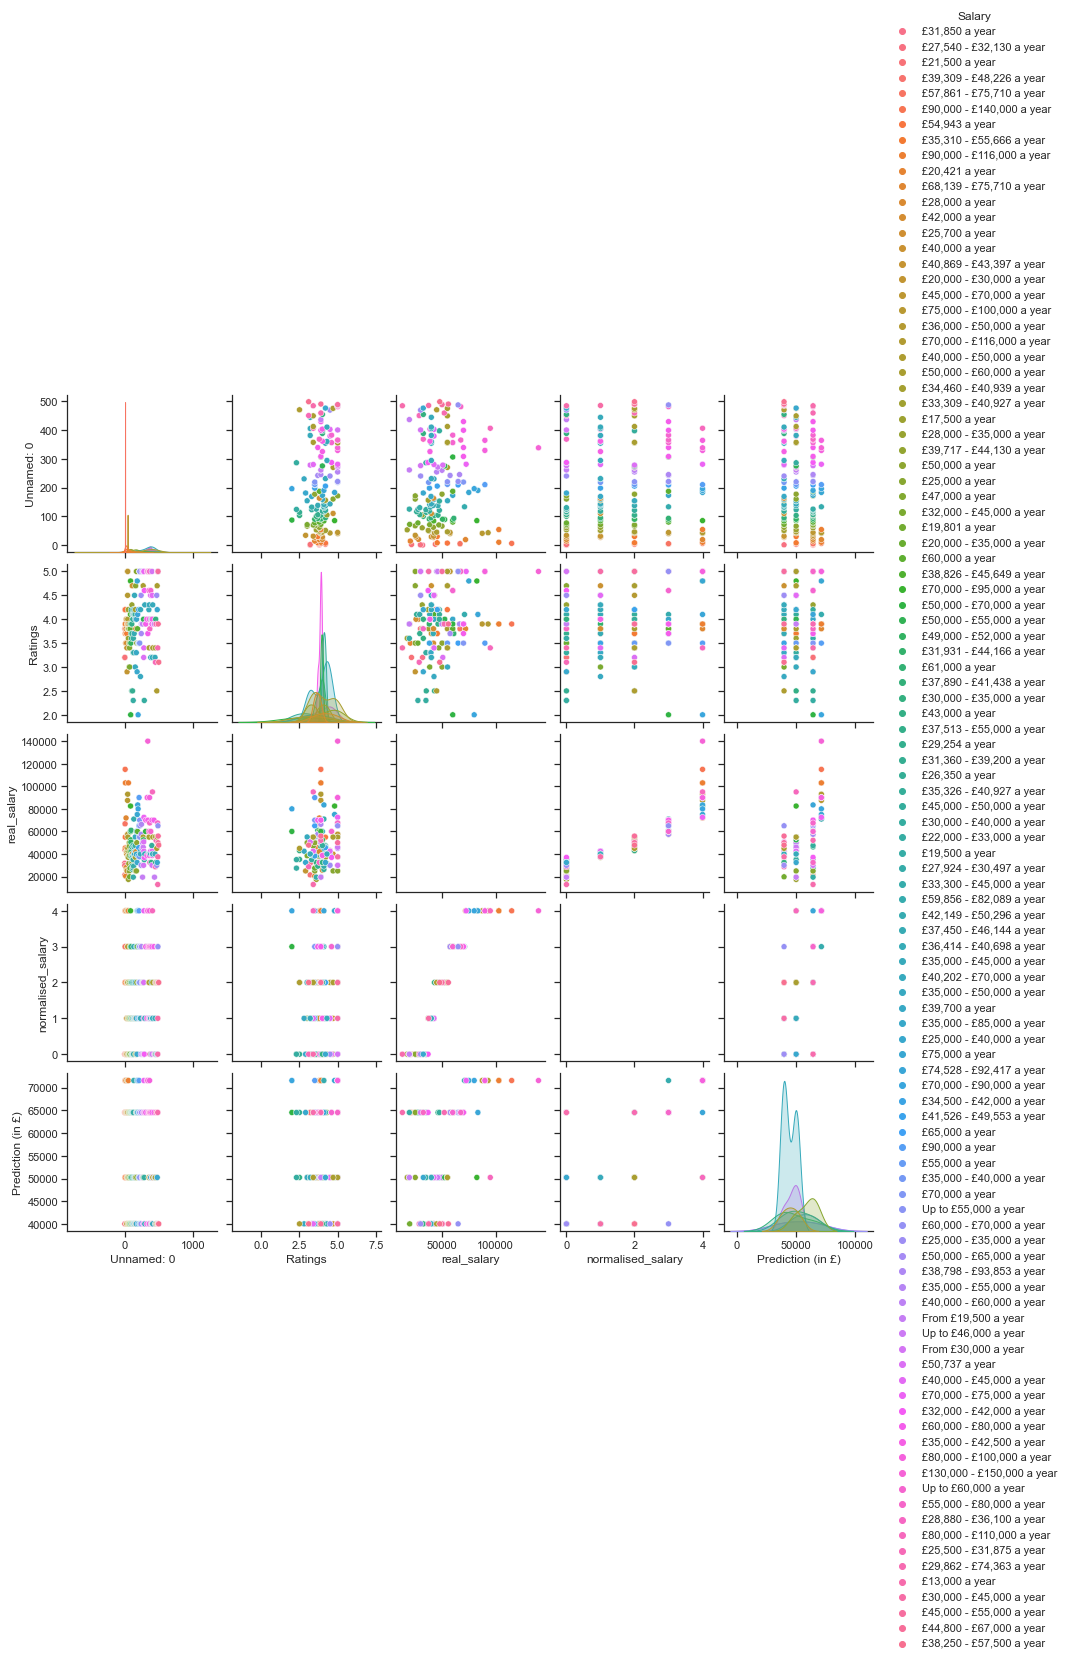

In [40]:
sns.set_theme(style="ticks")
sns.pairplot(jobs, hue="Salary")